In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [60]:
df = pd.read_csv('../data/unified_data.csv')

In [12]:
df

,ownerSex,ownerBirthday,ownerCardType,frequency,accountCreationDate,isShared,balance,loanDate,loanDuration,loanPayments,...,nMunicipalitiesOver10000Inhabitants,nCities,urbanInhabitantsRatio,averageSalary,unemploymentRate95,unemploymentRate96,nEnterpreneursPer1000Inhabitants,commitedCrimes95,commitedCrimes96,status
0,male,450204,NaN,monthly issuance,930226,1,27847.9,940105,24,3373,...,1,1,100.0,12541,0.29,0.43,167,85677,99107,0
1,female,390423,NaN,monthly issuance,950407,0,15854.0,960429,12,2523,...,1,7,67.0,9104,1.51,2.07,123,2299,2354,1
2,female,440613,NaN,monthly issuance,941019,0,23696.5,960502,24,6915,...,1,8,56.9,8427,1.12,1.54,107,1874,1913,0
3,female,450703,NaN,issuance after transaction,960511,1,78957.6,961106,12,7370,...,3,8,85.3,9317,6.49,7.07,97,6949,6872,0
4,male,391130,NaN,monthly issuance,931126,1,28015.4,940531,12,8734,...,3,5,48.3,8512,3.51,4.12,102,2247,2103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,female,801113,NaN,monthly issuance,941124,1,53252.4,961002,60,6541,...,1,6,58.0,8754,3.83,4.31,137,3804,3868,0
324,male,730216,NaN,monthly issuance,930114,0,21029.0,930915,12,4399,...,1,5,51.9,9045,3.13,3.60,124,1845,1879,0
325,female,451030,NaN,weekly issuance,950526,1,24704.4,951029,60,6998,...,1,1,100.0,12541,0.29,0.43,167,85677,99107,0
326,male,680413,classic,monthly issuance,941001,0,25689.9,960806,12,4502,...,1,6,53.8,8814,4.76,5.74,107,2112,2059,0


In [13]:
df.dtypes

ownerSex                                 object
ownerBirthday                             int64
ownerCardType                            object
frequency                                object
accountCreationDate                       int64
isShared                                  int64
balance                                 float64
loanDate                                  int64
loanDuration                              int64
loanPayments                              int64
loanAmount                                int64
ratio                                   float64
districtName                             object
region                                   object
nInhabitants                              int64
nMunicipalitiesSub499Inhabitants          int64
nMunicipalities500to1999Inhabitants       int64
nMunicipalities2000to9999Inhabitants      int64
nMunicipalitiesOver10000Inhabitants       int64
nCities                                   int64
urbanInhabitantsRatio                   

## commitedCrimes95 analysis

In [61]:
df['commitedCrimes95']

0      85677
1       2299
2       1874
3       6949
4       2247
       ...  
323     3804
324     1845
325    85677
326     2112
327     3244
Name: commitedCrimes95, Length: 328, dtype: object

In [62]:
cc95 = pd.to_numeric(df['commitedCrimes95'], errors='coerce')

In [63]:
df[cc95.isna()]

,ownerSex,ownerBirthday,ownerCardType,frequency,accountCreationDate,isShared,balance,loanDate,loanDuration,loanPayments,...,nMunicipalitiesOver10000Inhabitants,nCities,urbanInhabitantsRatio,averageSalary,unemploymentRate95,unemploymentRate96,nEnterpreneursPer1000Inhabitants,commitedCrimes95,commitedCrimes96,status
13,male,570217,NaN,monthly issuance,950613,0,8640.6,960411,48,4492,...,1,3,48.4,8173,?,7.01,124,?,1358,1
32,female,690313,NaN,issuance after transaction,941117,0,38697.3,960824,48,8094,...,1,3,48.4,8173,?,7.01,124,?,1358,1
217,female,500302,NaN,weekly issuance,960609,0,54740.9,960922,24,3505,...,1,3,48.4,8173,?,7.01,124,?,1358,0


In [70]:
cc95[cc95.isna()] = df[cc95.isna()]['commitedCrimes96']
len(cc95[cc95.isna()])

0

In [71]:
df['commitedCrimes95'] = cc95.astype(int)

## unemploymentRate95 analysis

In [73]:
ur95 = pd.to_numeric(df['unemploymentRate95'], errors='coerce')
ur95[ur95.isna()] = df[ur95.isna()]['unemploymentRate96']
df['unemploymentRate95'] = ur95.astype(int)
len(df[df['unemploymentRate95'].isna()])

0

## Boxplots to analyse outliers

/home/adria/Documents/repos/feup-ac-22-23/venv/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


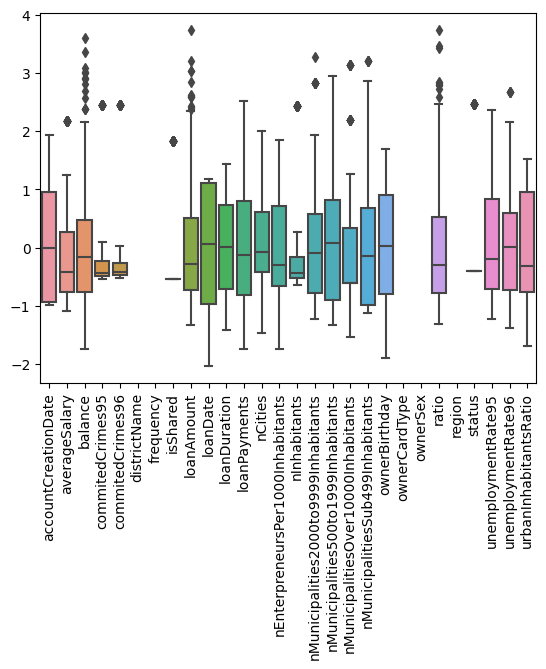

In [74]:
normalized_df = (df - df.mean(numeric_only=True)) / df.std(numeric_only=True)
plot = sns.boxplot(data=normalized_df)
plot.axes.tick_params(axis='x', rotation=90)

In [77]:
normalized_df

,accountCreationDate,averageSalary,balance,commitedCrimes95,commitedCrimes96,districtName,frequency,isShared,loanAmount,loanDate,...,nMunicipalitiesSub499Inhabitants,ownerBirthday,ownerCardType,ownerSex,ratio,region,status,unemploymentRate95,unemploymentRate96,urbanInhabitantsRatio
0,-0.984213,2.168622,-0.638129,2.446019,2.453704,NaN,NaN,1.833862,-0.611480,-1.040927,...,-1.125989,-1.096680,NaN,NaN,-0.793100,NaN,-0.403266,-1.223019,-1.376351,1.523838
1,0.949659,-0.360011,-1.181693,-0.483385,-0.472407,NaN,NaN,-0.543635,-1.092974,1.099454,...,1.370415,-1.573130,NaN,NaN,-1.069166,NaN,2.472194,-0.710694,-0.634932,-0.080171
2,0.050041,-0.858086,-0.826270,-0.498317,-0.485744,NaN,NaN,-0.543635,0.196218,1.107142,...,0.997389,-1.173119,NaN,NaN,0.374787,NaN,-0.403266,-0.710694,-0.874537,-0.571095
3,1.917888,-0.203305,1.678168,-0.320012,-0.335769,NaN,NaN,1.833862,-0.540333,1.170751,...,-0.867740,-1.092703,NaN,NaN,-0.525156,NaN,-0.403266,1.850929,1.625494,0.809325
4,-0.897970,-0.795551,-0.630537,-0.485212,-0.479998,NaN,NaN,1.833862,-0.384814,-0.996063,...,3.206850,-1.567495,NaN,NaN,-0.276328,NaN,-0.403266,0.313955,0.291843,-0.989109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.060102,-0.617509,0.513206,-0.430509,-0.426619,NaN,NaN,1.833862,2.348291,1.159799,...,1.284332,1.700037,NaN,NaN,2.592398,NaN,-0.403266,0.313955,0.377739,-0.517628
324,-0.994946,-0.403418,-0.947162,-0.499336,-0.486773,NaN,NaN,-0.543635,-0.879078,-2.008753,...,-0.494714,1.134994,NaN,NaN,-0.847691,NaN,-0.403266,0.313955,0.056759,-0.814126
325,0.961062,2.168622,-0.780592,2.446019,2.453704,NaN,NaN,1.833862,2.608821,0.109512,...,-1.125989,-1.090097,NaN,NaN,1.591007,NaN,-0.403266,-1.223019,-1.376351,1.523838
326,0.048316,-0.573366,-0.735929,-0.489955,-0.481329,NaN,NaN,-0.543635,-0.867334,1.139157,...,2.862518,0.738068,NaN,NaN,-0.821827,NaN,-0.403266,0.826279,1.024221,-0.721774


Attributes with outliers:
- averageSalary
- commitedCrimes95/96
- loanAmount
- loanDate (?)
- nEnterpreneursPer1000Inhabitants
- nInhabitants
- nMunicipalities > won't be looked at
- OwnerBirthday (what is going on here)
- unemploymentRate95/96

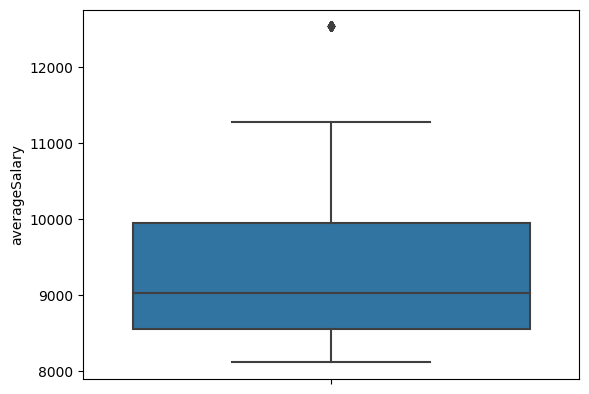

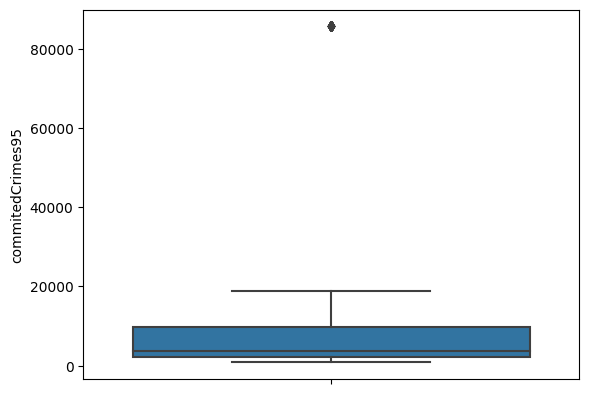

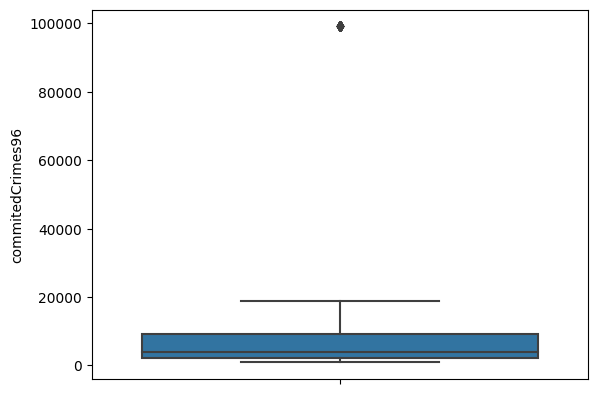

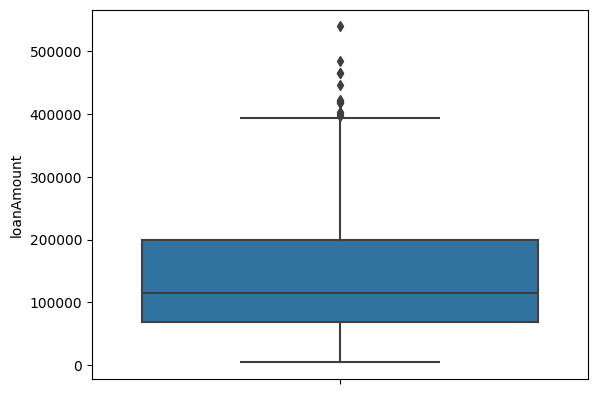

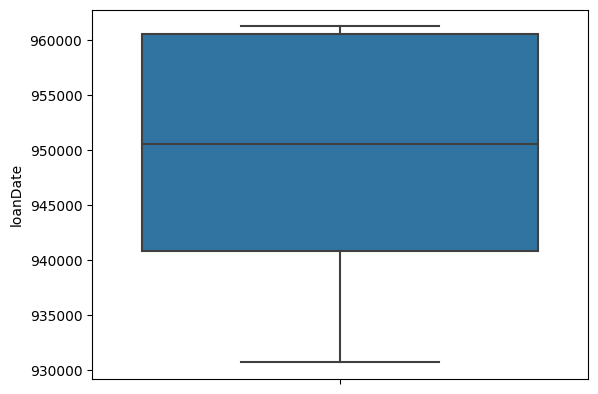

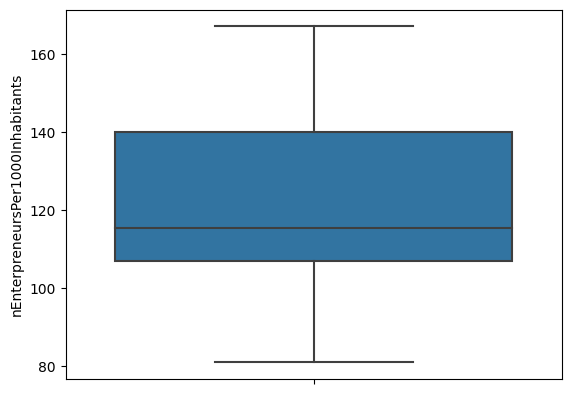

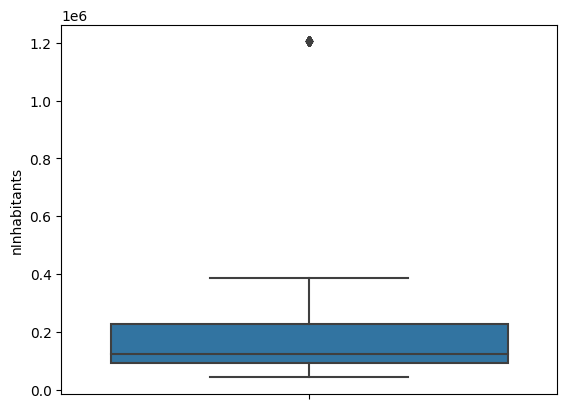

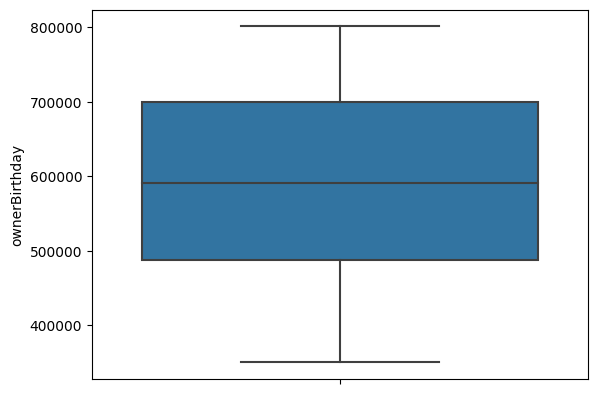

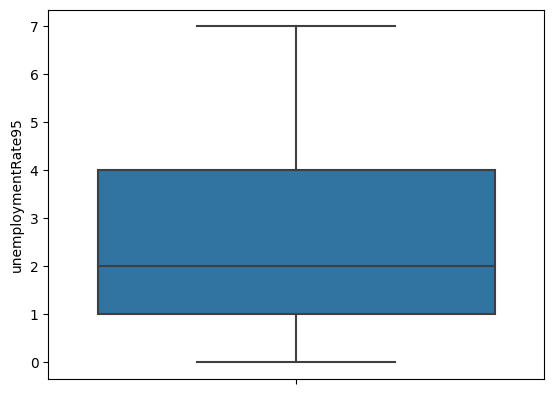

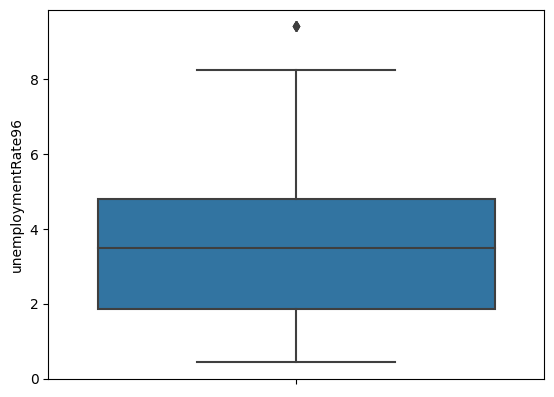

In [76]:
for a in ['averageSalary', 'commitedCrimes95', 'commitedCrimes96', 'loanAmount', 'loanDate', 'nEnterpreneursPer1000Inhabitants','nInhabitants','ownerBirthday', 'unemploymentRate95', 'unemploymentRate96']:
    sns.boxplot(data=df, y=a)
    plt.show()